#**Model analisis sentimen ulasan aplikasi *Xiaomi Home* - Muhamad Thirafi Qaedi S.**


## **Import Library**

In [1]:
# Import library yang dibutuhkan
import string
import datetime as dt
import numpy as np
import os
import re
seed = 0
np.random.seed(seed)
import pandas as pd
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install Sastrawi

In [3]:
# Import pustaka NLTK (Natural Language Toolkit)
import nltk
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks
nltk.download('stopwords')  # Mengunduh daftar kata-kata berhenti (stop words) dalam berbagai bahasa
nltk.download('punkt_tab') # Mengunduh Tokenisasi kalimat atau kata dalam teks yang lebih rumit dan lebih spesifik.

# Import library pemrosesan teks
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Import library untuk pemrosesan bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
from wordcloud import WordCloud

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dropout, Dense, Flatten, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

## Load data

In [8]:
dataS_mihome = pd.read_csv('https://raw.githubusercontent.com/ThirafiQaedi/BPML_DicodingSubmission1_ProyekAnalisisSentimen_THR/refs/heads/main/Xiaomi_Home_rv.csv')

In [9]:
dataS_mihome.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,aaebb58f-07d0-4458-bb49-2cfd8812bf5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mungkin ada yg sama dengan saya... Xiaomi akst...,3,1,10.4.700,2025-04-01 05:12:13,NaN,NaN,10.4.700
1,8811ef94-1b81-45d4-8cef-777b77f9dbdd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong ya langganan cloud itu benar benar dija...,1,2,10.2.702,2025-03-10 08:32:48,NaN,NaN,10.2.702
2,d93ab9d0-9352-491f-ab95-79af1653f82c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Lumayan,tapi sayang beberapa kamera tidak bisa...",4,8,10.2.700,2025-02-02 22:02:25,NaN,NaN,10.2.700
3,ff8526ef-6161-4b2f-8d37-b18273f26bf5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,history video sd card kadang error dan tidak b...,1,1,10.4.700,2025-04-04 05:31:02,NaN,NaN,10.4.700
4,f6296fa3-5da4-4990-ba7a-93fc2dbe78ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pake cctv c300 tapii kenapa ya micro SD bermas...,1,7,10.2.700,2025-01-31 04:48:02,NaN,NaN,10.2.700


In [10]:
print("Jumlah Baris dan Kolom:")
print(dataS_mihome.shape)

Jumlah Baris dan Kolom:
(15472, 11)


In [11]:
dataS_mihome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15472 entries, 0 to 15471
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15472 non-null  object
 1   userName              15472 non-null  object
 2   userImage             15472 non-null  object
 3   content               15471 non-null  object
 4   score                 15472 non-null  int64 
 5   thumbsUpCount         15472 non-null  int64 
 6   reviewCreatedVersion  12251 non-null  object
 7   at                    15472 non-null  object
 8   replyContent          5 non-null      object
 9   repliedAt             5 non-null      object
 10  appVersion            12251 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [12]:
dataS_mihome.describe(include="all")

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
count,15472,15472,15472,15471,15472.000000,15472.000000,12251,15472,5,5,12251
unique,15472,1238,1247,9262,NaN,NaN,380,15472,5,5,380
top,3e9b8ea4-ca57-44a4-b069-8aba7e010274,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap,NaN,NaN,5.8.7,2023-05-23 08:28:18,"Hi there,\nThanks for your feedback. Would yo...",2018-09-25 11:07:30,5.8.7
freq,1,14225,14225,738,NaN,NaN,834,1,1,1,834
mean,NaN,NaN,NaN,NaN,4.046730,1.448358,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.529095,7.720803,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN


##Data cleaning

In [13]:
print("Missing value :")
dataS_mihome.isna().sum()

Missing value :


,0
reviewId,0
userName,0
userImage,0
content,1
score,0
thumbsUpCount,0
reviewCreatedVersion,3221
at,0
replyContent,15467
repliedAt,15467


In [14]:
#check duplikat
duplikat = dataS_mihome.duplicated().sum()
print(f"Number of duplicate rows: {duplikat}")

Number of duplicate rows: 0


In [15]:
# Menghapus missing value pada kolom 'replyContent' dan 'repliedAt'
clean_data_mihome = dataS_mihome.drop(columns=['replyContent', 'repliedAt'])
# menghapus baris yang memiliki nilai yang hilang (NaN) di clean_data_mihome dari 'reviewCreatedVersion' dan 'appVersion'
clean_data_mihome = clean_data_mihome.dropna()
# Menghapus data duplikat
clean_data_mihome = clean_data_mihome.drop_duplicates()

In [16]:
clean_data_mihome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12251 entries, 0 to 13546
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12251 non-null  object
 1   userName              12251 non-null  object
 2   userImage             12251 non-null  object
 3   content               12251 non-null  object
 4   score                 12251 non-null  int64 
 5   thumbsUpCount         12251 non-null  int64 
 6   reviewCreatedVersion  12251 non-null  object
 7   at                    12251 non-null  object
 8   appVersion            12251 non-null  object
dtypes: int64(2), object(7)
memory usage: 957.1+ KB


In [17]:
print("Missing value :")
clean_data_mihome.isna().sum()

Missing value :


,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


In [18]:
# Menghitung jumlah baris dan kolom dalam DataFrame clean_data_mihome setelah menghapus duplikat
jumlah_ulasan_clean, jumlah_kolom_clean = clean_data_mihome.shape
print(f"jumlah_kolom_setelah_hapus_duplikat: {jumlah_kolom_clean}")
print(f"jumlah_ulasan_setelah_hapus_duplikat: {jumlah_ulasan_clean}")

jumlah_kolom_setelah_hapus_duplikat: 9
jumlah_ulasan_setelah_hapus_duplikat: 12251


##Preprocessing Text

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [19]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # hapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # hapus hashtag
    text = re.sub(r'RT[\s]', '', text) # hapus RT
    text = re.sub(r"http\S+", '', text) # hapus link
    text = re.sub(r'[0-9]+', '', text) # hapus numbers
    text = re.sub(r'[^\w\s]', '', text) # hapus numbers

    text = text.replace('\n', ' ') # Ganti baris baru menjadi spasi.
    text = text.translate(str.maketrans('', '', string.punctuation)) # Hapus semua tanda baca.
    text = text.strip(' ') # Hapus karakter spasi di kedua sisi teks.
    return text



def filteringText(text): # menghapus kata-kata berhenti (stopwords) dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def casefoldingText(text): # ubah semua karakter jadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): #membagi teks menjadi daftar kata atau token.
    text = word_tokenize(text)
    return text

def toSentence(list_words): # Ubah List kata menjadi kalimat.
    sentence = ' '.join(word for word in list_words)
    return sentence

def stemmingText(text): # menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya.
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text


In [20]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [21]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [22]:
clean_data_mihome

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,aaebb58f-07d0-4458-bb49-2cfd8812bf5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mungkin ada yg sama dengan saya... Xiaomi akst...,3,1,10.4.700,2025-04-01 05:12:13,10.4.700
1,8811ef94-1b81-45d4-8cef-777b77f9dbdd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong ya langganan cloud itu benar benar dija...,1,2,10.2.702,2025-03-10 08:32:48,10.2.702
2,d93ab9d0-9352-491f-ab95-79af1653f82c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Lumayan,tapi sayang beberapa kamera tidak bisa...",4,8,10.2.700,2025-02-02 22:02:25,10.2.700
3,ff8526ef-6161-4b2f-8d37-b18273f26bf5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,history video sd card kadang error dan tidak b...,1,1,10.4.700,2025-04-04 05:31:02,10.4.700
4,f6296fa3-5da4-4990-ba7a-93fc2dbe78ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pake cctv c300 tapii kenapa ya micro SD bermas...,1,7,10.2.700,2025-01-31 04:48:02,10.2.700
...,...,...,...,...,...,...,...,...,...
13542,204f771e-b12c-457e-91a5-059f74cfe13e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,susah,1,0,3.5.14,2019-01-03 10:22:00,3.5.14
13543,83122ebc-16a6-430e-9a65-4c62fb105263,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,2,3.5.14,2016-12-08 05:53:54,3.5.14
13544,ce50fb22-4f02-4503-803e-7ff1399a6528,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Camera connect tapi kondisi off. Lampu biru bi...,2,1,3.5.6,2016-04-18 00:32:53,3.5.6
13545,98e03791-d54d-42c9-b50d-642f4f06f8a6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kenapa bahsanya cina gitu,gmn nih pakenya?",2,3,3.5.6,2016-04-20 03:24:13,3.5.6


In [23]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_data_mihome['text_clean'] = clean_data_mihome['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_data_mihome['text_casefoldingText'] = clean_data_mihome['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_data_mihome['text_slangwords'] = clean_data_mihome['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_data_mihome['text_tokenizingText'] = clean_data_mihome['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_data_mihome['text_stopword'] = clean_data_mihome['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_data_mihome['text_akhir'] = clean_data_mihome['text_stopword'].apply(toSentence)

In [24]:
clean_data_mihome

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,aaebb58f-07d0-4458-bb49-2cfd8812bf5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mungkin ada yg sama dengan saya... Xiaomi akst...,3,1,10.4.700,2025-04-01 05:12:13,10.4.700,mungkin ada yg sama dengan saya Xiaomi akstend...,mungkin ada yg sama dengan saya xiaomi akstend...,mungkin ada yang sama dengan saya xiaomi akste...,"[mungkin, ada, yang, sama, dengan, saya, xiaom...","[xiaomi, akstender, ac, dual, band, repeater, ...",xiaomi akstender ac dual band repeater wifi no...
1,8811ef94-1b81-45d4-8cef-777b77f9dbdd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong ya langganan cloud itu benar benar dija...,1,2,10.2.702,2025-03-10 08:32:48,10.2.702,Tolong ya langganan cloud itu benar benar dija...,tolong ya langganan cloud itu benar benar dija...,tolong iya langganan cloud itu benar benar dij...,"[tolong, iya, langganan, cloud, itu, benar, be...","[tolong, langganan, cloud, dijalankan, hilang,...",tolong langganan cloud dijalankan hilang uang ...
2,d93ab9d0-9352-491f-ab95-79af1653f82c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Lumayan,tapi sayang beberapa kamera tidak bisa...",4,8,10.2.700,2025-02-02 22:02:25,10.2.700,Lumayantapi sayang beberapa kamera tidak bisa ...,lumayantapi sayang beberapa kamera tidak bisa ...,lumayantapi sayang beberapa kamera tidak bisa ...,"[lumayantapi, sayang, beberapa, kamera, tidak,...","[lumayantapi, sayang, kamera, frametidak, merk...",lumayantapi sayang kamera frametidak merk sebe...
3,ff8526ef-6161-4b2f-8d37-b18273f26bf5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,history video sd card kadang error dan tidak b...,1,1,10.4.700,2025-04-04 05:31:02,10.4.700,history video sd card kadang error dan tidak b...,history video sd card kadang error dan tidak b...,history video sd card kadang error dan tidak b...,"[history, video, sd, card, kadang, error, dan,...","[history, video, sd, card, kadang, error, terb...",history video sd card kadang error terbukatolo...
4,f6296fa3-5da4-4990-ba7a-93fc2dbe78ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pake cctv c300 tapii kenapa ya micro SD bermas...,1,7,10.2.700,2025-01-31 04:48:02,10.2.700,Pake cctv c tapii kenapa ya micro SD bermasala...,pake cctv c tapii kenapa ya micro sd bermasala...,pakai cctv c tapii kenapa iya micro sd bermasa...,"[pakai, cctv, c, tapii, kenapa, iya, micro, sd...","[pakai, cctv, c, tapii, micro, sd, bermasalah,...",pakai cctv c tapii micro sd bermasalah bolak f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13542,204f771e-b12c-457e-91a5-059f74cfe13e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,susah,1,0,3.5.14,2019-01-03 10:22:00,3.5.14,susah,susah,susah,[susah],[susah],susah
13543,83122ebc-16a6-430e-9a65-4c62fb105263,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,2,3.5.14,2016-12-08 05:53:54,3.5.14,Good,good,good,[good],[good],good
13544,ce50fb22-4f02-4503-803e-7ff1399a6528,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Camera connect tapi kondisi off. Lampu biru bi...,2,1,3.5.6,2016-04-18 00:32:53,3.5.6,Camera connect tapi kondisi off Lampu biru bis...,camera connect tapi kondisi off lampu biru bis...,camera connect tapi kondisi off lampu biru bis...,"[camera, connect, tapi, kondisi, off, lampu, b...","[camera, connect, kondisi, lampu, biru, please...",camera connect kondisi lampu biru please mohon...
13545,98e03791-d54d-42c9-b50d-642f4f06f8a6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kenapa bahsanya cina gitu,gmn nih pakenya?",2,3,3.5.6,2016-04-20 03:24:13,3.5.6,kenapa bahsanya cina gitugmn nih pakenya,kenapa bahsanya cina gitugmn nih pakenya,kenapa bahsanya cina gitugmn ini pakenya,"[kenapa, bahsanya, cina, gitugmn, ini, pakenya]","[b

##Pelabelan data

In [25]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

In [26]:
# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [27]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 1):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 1, maka polaritas adalah positif
    elif (score < -1):
        polarity = 'negative'
        # Jika skor sentimen kurang dari -1, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [28]:
# Memberi label pada text
results = clean_data_mihome['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_data_mihome['polarity_score'] = results[0]
clean_data_mihome['polarity'] = results[1]
print(clean_data_mihome['polarity'].value_counts())

polarity
positive    5525
neutral     4040
negative    2686
Name: count, dtype: int64


##Menganalisa Data

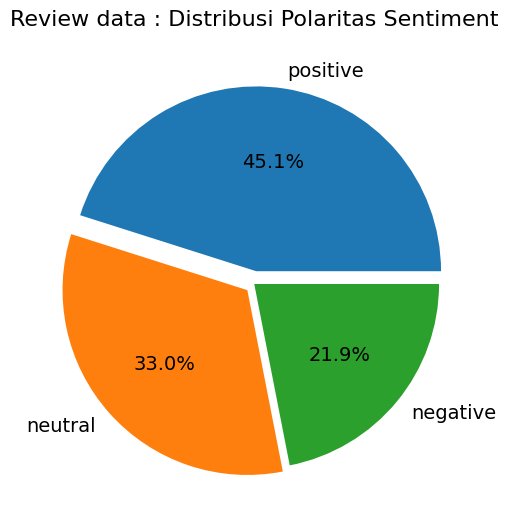

In [29]:

fig, ax = plt.subplots(figsize=(6, 6)) # Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
explode = (0.07, 0.05, 0) # Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
Ukuran = [count for count in clean_data_mihome['polarity'].value_counts()] # Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_data_mihome' dan menyimpannya dalam list 'Ukuran'.
labels = list(clean_data_mihome['polarity'].value_counts().index) # Mengambil label atau kategori sentimen dari DataFrame 'clean_data_mihome' dan menyimpannya dalam list 'labels'.

# Membuat pie chart dengan data 'Ukuran', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=Ukuran, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Review data : Distribusi Polaritas Sentiment', fontsize=16, pad=20) # Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
plt.show()# Menampilkan pie chart.

####**Word Cloud**

#####positif

In [30]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_reviews' yang hanya berisi tweet dengan polaritas positif.
positive_reviews = clean_data_mihome[clean_data_mihome['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_reviews'.
positive_reviews = positive_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_reviews' berdasarkan 'polarity_score' secara menurun.
positive_reviews = positive_reviews.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_reviews = positive_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_reviews.index += 1

#####Negatif

In [31]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_reviews' yang hanya berisi tweet dengan polaritas negatif.
negative_reviews = clean_data_mihome[clean_data_mihome['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_reviews'.
negative_reviews = negative_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_reviews' berdasarkan 'polarity_score' secara menaik (ascending).
negative_reviews = negative_reviews.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_reviews = negative_reviews[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_reviews = negative_reviews.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_reviews.index += 1

#####wordcloud PLot

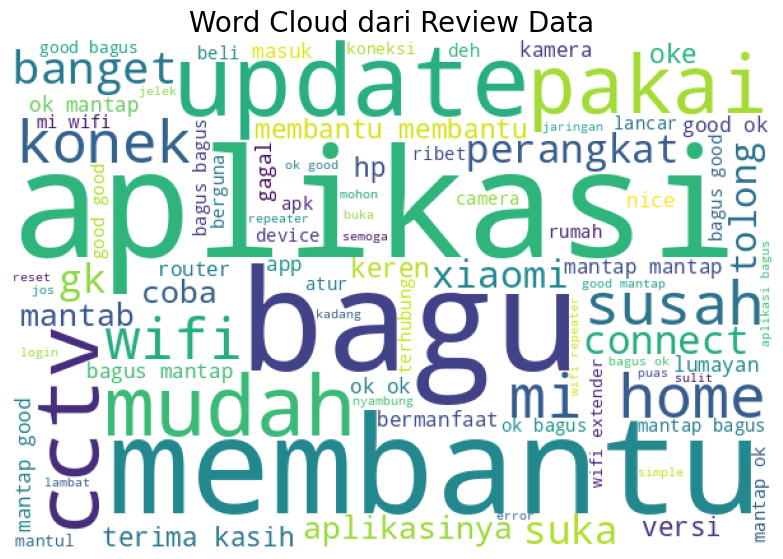

In [32]:
# Membuat string kosong 'word_List' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
word_List = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'clean_data_mihome'.
for review in clean_data_mihome['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'word_List'.
        word_List += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(word_List)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud dari Review Data', fontsize=20)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

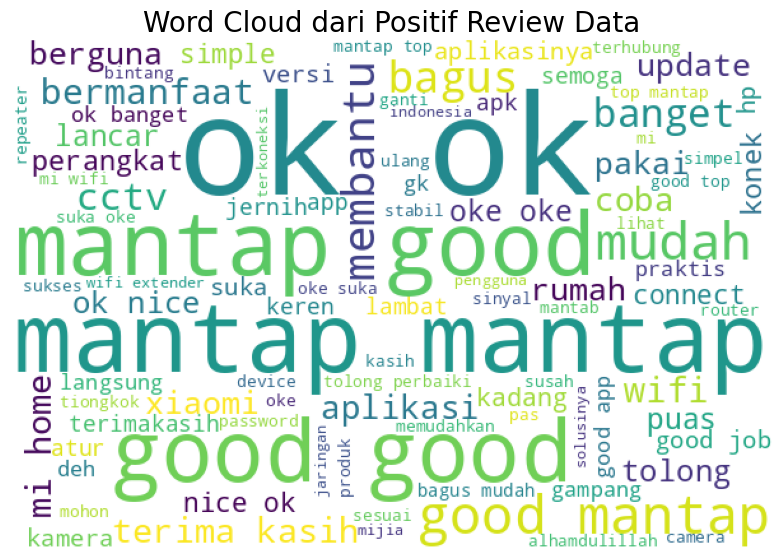

In [33]:
# Membuat string kosong 'word_List' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
word_List = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'positive_reviews'.
for review in positive_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'word_List'.
        word_List += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(word_List)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud dari Positif Review Data', fontsize=20)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

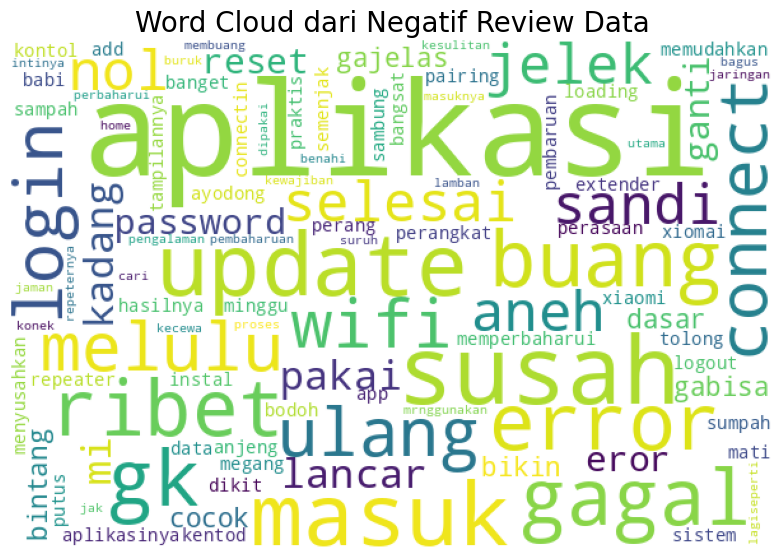

In [34]:
# Membuat string kosong 'word_List' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
word_List = ''

# Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame 'negative_reviews'.
for review in negative_reviews['text_stopword']:
    # Iterasi melalui setiap kata dalam review.
    for word in review:
        # Menambahkan kata ke dalam 'word_List'.
        word_List += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(word_List)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud dari Negatif Review Data', fontsize=20)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

##### visualization Bar Plot

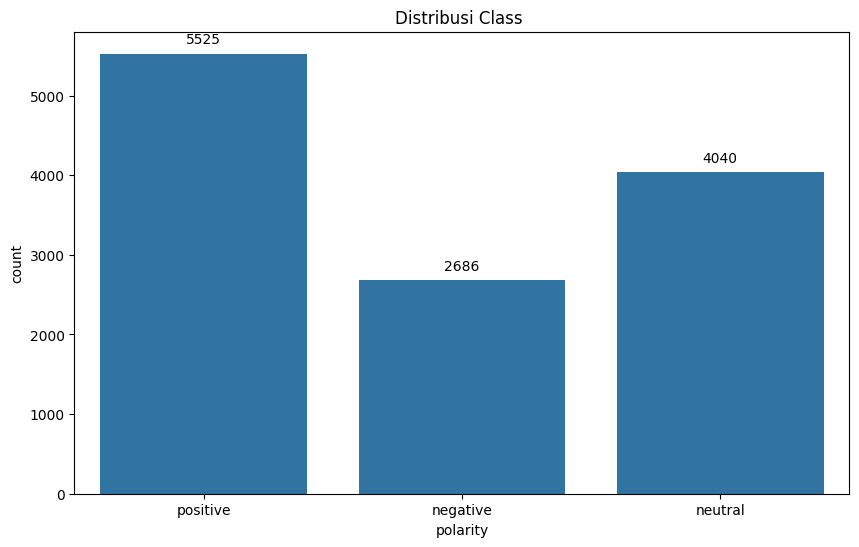

In [35]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_distribution_plot = sns.countplot(x='polarity', data=clean_data_mihome)
plt.title('Distribusi Class ')

# Add counts above the bars on the plot
for x in class_distribution_plot.patches:
    class_distribution_plot.annotate(format(x.get_height(), '.0f'),
                              (x.get_x() + x.get_width() / 2., x.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()



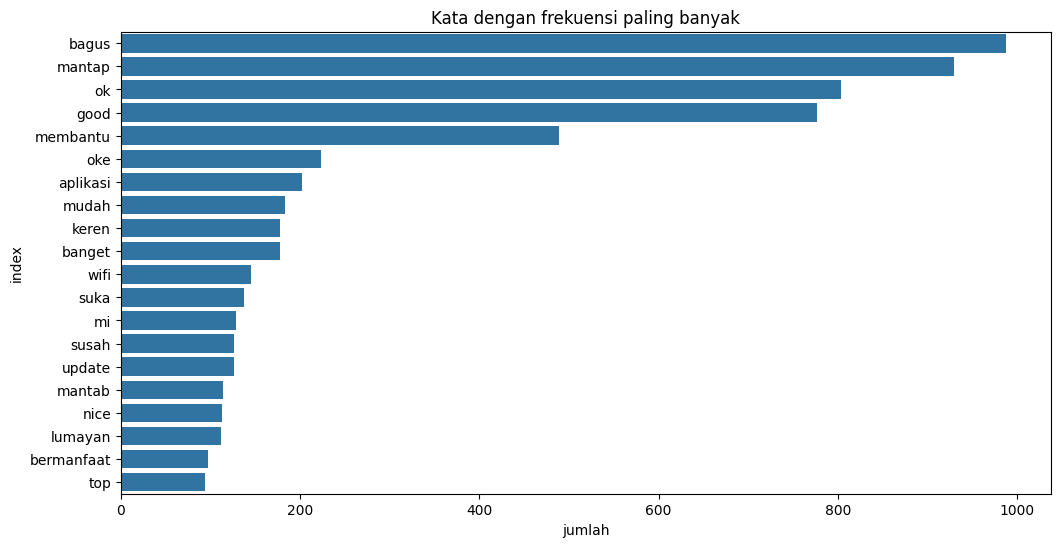

In [36]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_data_mihome['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata dengan frekuensi paling banyak')
plt.show()

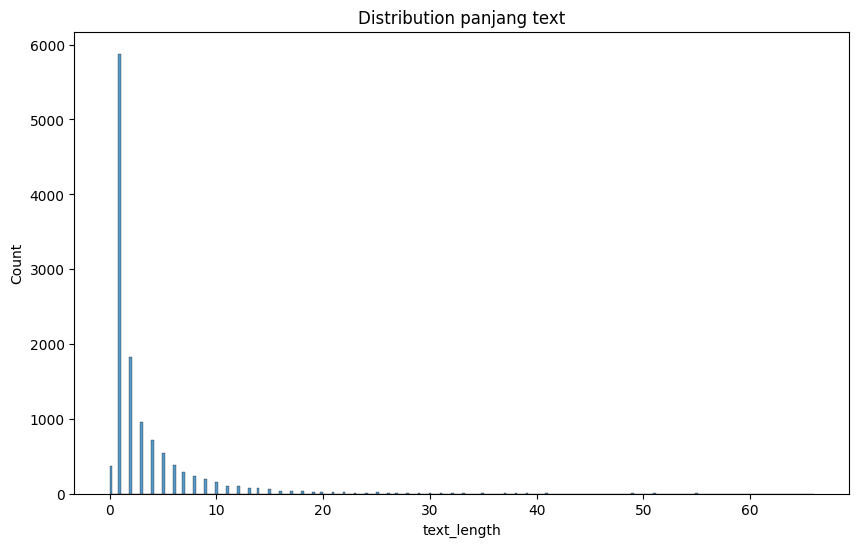

In [37]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_data_mihome['text_length'] = clean_data_mihome['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_data_mihome['text_length'])
plt.title('Distribution panjang text')
plt.show()



## **Split Data Untuk training dan Testing**

In [38]:
clean_data_mihome.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,aaebb58f-07d0-4458-bb49-2cfd8812bf5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,mungkin ada yg sama dengan saya... Xiaomi akstender AC1200 dual band tidak bisa repeater untuk wifi non password ataupun hiden/tersembunyi dengan apk terbaru dari playstore.. tutorial YouTube malah harus menggunakan versi 4.xx dan android 7... tolong berikan solusi yah bagi pengguna perangkat ini.... WiFi digunakan lingkungan kantor khusus untuk pekerja agar tidak di curi...,3,1,10.4.700,2025-04-01 05:12:13,10.4.700,mungkin ada yg sama dengan saya Xiaomi akstender AC dual band tidak bisa repeater untuk wifi non password ataupun hidentersembunyi dengan apk terbaru dari playstore tutorial YouTube malah harus menggunakan versi xx dan android tolong berikan solusi yah bagi pengguna perangkat ini WiFi digunakan lingkungan kantor khusus untuk pekerja agar tidak di curi,mungkin ada yg sama dengan saya xiaomi akstender ac dual band tidak bisa repeater untuk wifi non password ataupun hidentersembunyi dengan apk terbaru dari playstore tutorial youtube malah harus menggunakan versi xx dan android tolong berikan solusi yah bagi pengguna perangkat ini wifi digunakan lingkungan kantor khusus untuk pekerja agar tidak di curi,mungkin ada yang sama dengan saya xiaomi akstender ac dual band tidak bisa repeater untuk wifi non password ataupun hidentersembunyi dengan apk terbaru dari playstore tutorial youtube bahkan harus menggunakan versi xx dan android tolong berikan solusi yah bagi pengguna perangkat ini wifi digunakan lingkungan kantor khusus untuk pekerja agar tidak di curi,"[mungkin, ada, yang, sama, dengan, saya, xiaomi, akstender, ac, dual, band, tidak, bisa, repeater, untuk, wifi, non, password, ataupun, hidentersembunyi, dengan, apk, terbaru, dari, playstore, tutorial, youtube, bahkan, harus, menggunakan, versi, xx, dan, android, tolong, berikan, solusi, yah, bagi, pengguna, perangkat, ini, wifi, digunakan, lingkungan, kantor, khusus, untuk, pekerja, agar, tidak, di, curi]","[xiaomi, akstender, ac, dual, band, repeater, wifi, non, password, hidentersembunyi, apk, terbaru, playstore, tutorial, youtube, versi, xx, android, tolong, solusi, yah, pengguna, perangkat, wifi, lingkungan, kantor, khusus, pekerja, curi]",xiaomi akstender ac dual band repeater wifi non password hidentersembunyi apk terbaru playstore tutorial youtube versi xx android tolong solusi yah pengguna perangkat wifi lingkungan kantor khusus pekerja curi,9,positive,29
1,8811ef94-1b81-45d4-8cef-777b77f9dbdd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tolong ya langganan cloud itu benar benar dijalankan, saya sudah hilang uang gara2 langganan cloud yang error terus saat sudah dibayar, historical video tidak muncul, malahan disuruh langganan lagi, aplikasi macam apa ini, penipuaann.",1,2,10.2.702,2025-03-10 08:32:48,10.2.702,Tolong ya langganan cloud itu benar benar dijalankan saya sudah hilang uang gara langganan cloud yang error terus saat sudah dibayar historical video tidak muncul malahan disuruh langganan lagi aplikasi macam apa ini penipuaann,tolong ya langganan cloud itu benar benar dijalankan saya sudah hilang uang gara langganan cloud yang error terus saat sudah dibayar historical video tidak muncul malahan disuruh langganan lagi aplikasi macam apa ini penipuaann,tolong iya langganan cloud itu benar benar dijalankan saya sudah hilang uang gara langganan cloud yang error terus saat sudah dibayar historical video tidak muncul malahan disuruh langganan lagi aplikasi macam apa ini penipuaann,"[tolong, iya, langganan, cloud, itu, benar, benar, dijalankan, saya, sudah, hilang, uang, gara, la

In [39]:
clean_data_mihome.tail(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
13544,ce50fb22-4f02-4503-803e-7ff1399a6528,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Camera connect tapi kondisi off. Lampu biru bisa di on off kan. Please, mohon dibantu.",2,1,3.5.6,2016-04-18 00:32:53,3.5.6,Camera connect tapi kondisi off Lampu biru bisa di on off kan Please mohon dibantu,camera connect tapi kondisi off lampu biru bisa di on off kan please mohon dibantu,camera connect tapi kondisi off lampu biru bisa di on off kan please mohon dibantu,"[camera, connect, tapi, kondisi, off, lampu, biru, bisa, di, on, off, kan, please, mohon, dibantu]","[camera, connect, kondisi, lampu, biru, please, mohon, dibantu]",camera connect kondisi lampu biru please mohon dibantu,3,positive,8
13545,98e03791-d54d-42c9-b50d-642f4f06f8a6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"kenapa bahsanya cina gitu,gmn nih pakenya?",2,3,3.5.6,2016-04-20 03:24:13,3.5.6,kenapa bahsanya cina gitugmn nih pakenya,kenapa bahsanya cina gitugmn nih pakenya,kenapa bahsanya cina gitugmn ini pakenya,"[kenapa, bahsanya, cina, gitugmn, ini, pakenya]","[bahsanya, cina, gitugmn, pakenya]",bahsanya cina gitugmn pakenya,0,neutral,4
13546,bbd09e31-fd63-40c3-ad45-9884a75c646f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Saya butuh aplikasi ini utk keperluan sehari hari...,5,6,3.5.6,2016-04-05 23:39:43,3.5.6,Saya butuh aplikasi ini utk keperluan sehari hari,saya butuh aplikasi ini utk keperluan sehari hari,saya butuh aplikasi ini untuk keperluan sehari hari,"[saya, butuh, aplikasi, ini, untuk, keperluan, sehari, hari]","[butuh, aplikasi, keperluan, sehari]",butuh aplikasi keperluan sehari,-4,negative,4


In [40]:
# Pisahkan data menjadi fitur (Review) dan label (sentimen)
y = clean_data_mihome['polarity']
X = clean_data_mihome['text_akhir']

### Ekstraksi fitur

##### TF-IDF

In [41]:
# Ekstraksi fitur dengan TF-IDF
tf_idf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_Tf_Idf = tf_idf.fit_transform(X)

In [42]:
# Bagi data yang telah di extrasi dengan TF-IDF menjadi data latih dan data uji untuk Model2 dengan Pembagian Data: 80/20
X_train_Tf_Idf, X_test_Tf_Idf, y_train_Tf_Idf, y_test_Tf_Idf = train_test_split(X_Tf_Idf, y, test_size=0.2, random_state=42)

##### Tokenizer

In [43]:
#copy data awal untuk di gunakan di tokenizer
y_cate = y.copy()
X_tok = X.copy()

# Tokenisasi
max_features_tok = 2500
tokenizer = Tokenizer(num_words=max_features_tok, split=' ')
tokenizer.fit_on_texts(X_tok.values)
X_tok = tokenizer.texts_to_sequences(X.values)
X_tok = pad_sequences(X_tok)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y_cate)
y_cate = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y_cate.shape[1]

In [44]:
# Bagi data yang telah di extrasi dengan Tokenizer menjadi data latih dan data uji untuk Model LSTM Pembagian Data: 80/20
X_train_token, X_test_token, y_train_token, y_test_token = train_test_split(X_tok, y_cate, test_size=0.2, random_state=42)

## **PEMODELAN**

#### Naive Bayes

In [45]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train_Tf_Idf.toarray(), y_train_Tf_Idf)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train_Tf_Idf.toarray())
y_pred_test_nb = naive_bayes.predict(X_test_Tf_Idf.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train_Tf_Idf)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test_Tf_Idf)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train :', accuracy_train_nb)
print('Naive Bayes - accuracy_test  :', accuracy_test_nb)

Naive Bayes - accuracy_train : 0.8638775510204082
Naive Bayes - accuracy_test  : 0.8629130966952264


SVM

In [46]:
svm = SVC(kernel='linear', random_state=42)

svm.fit(X_train_Tf_Idf.toarray(), y_train_Tf_Idf)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm.predict(X_train_Tf_Idf.toarray())
y_pred_test_svm = svm.predict(X_test_Tf_Idf.toarray())

# Evaluasi akurasi model SVM pada data pelatihan
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train_Tf_Idf)

# Evaluasi akurasi model SVM Regression pada data uji
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test_Tf_Idf)

# Menampilkan akurasi
print('SVM - accuracy_train  :', accuracy_train_svm)
print('SVM - accuracy_test   :', accuracy_test_svm)

SVM - accuracy_train  : 0.9124489795918367
SVM - accuracy_test   : 0.8963688290493677


LSTM

In [47]:
class StopAtAccuracy(Callback):
    def __init__(self, target_acc=0.94):
        super().__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.target_acc:
            print(f"\n✅ Target akurasi {self.target_acc*100:.0f}% tercapai di epoch {epoch+1}. Training dihentikan.")
            self.model.stop_training = True

In [48]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features_tok, 256, input_length=X_tok.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(3, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

#point stopping kustom pada 94%
callbacks = StopAtAccuracy(target_acc=0.94)

# Melatih model dengan early stopping kustom
history = model_LSTM.fit(X_train_token, y_train_token, epochs=50, batch_size=128, verbose=2, callbacks=[callbacks], validation_data=(X_test_token, y_test_token))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


77/77 - 71s - 916ms/step - accuracy: 0.4726 - loss: 2.8676 - val_accuracy: 0.6006 - val_loss: 1.1092
Epoch 2/50
77/77 - 81s - 1s/step - accuracy: 0.8489 - loss: 0.5974 - val_accuracy: 0.8919 - val_loss: 0.3916
Epoch 3/50
77/77 - 84s - 1s/step - accuracy: 0.9289 - loss: 0.2971 - val_accuracy: 0.9200 - val_loss: 0.2948
Epoch 4/50
77/77 - 81s - 1s/step - accuracy: 0.9540 - loss: 0.2069 - val_accuracy: 0.9253 - val_loss: 0.2699
Epoch 5/50
77/77 - 82s - 1s/step - accuracy: 0.9628 - loss: 0.1708 - val_accuracy: 0.9188 - val_loss: 0.2663
Epoch 6/50
77/77 - 80s - 1s/step - accuracy: 0.9683 - loss: 0.1463 - val_accuracy: 0.9319 - val_loss: 0.2446
Epoch 7/50
77/77 - 80s - 1s/step - accuracy: 0.9742 - loss: 0.1278 - val_accuracy: 0.9319 - val_loss: 0.2555
Epoch 8/50
77/77 - 83s - 1s/step - accuracy: 0.9803 - loss: 0.1065 - val_accuracy: 0.9278 - val_loss: 0.2703
Epoch 9/50
77/77 - 82s - 1s/step - accuracy: 0.9794 - loss: 0.1046 - val_accuracy: 0.9319 - val_loss: 0.2706
Epoch 10/50
77/77 - 59s - 7

In [49]:
# Evaluasi model
LSTM_score, LSTM_accr = model_LSTM.evaluate(X_test_token, y_test_token, verbose=2)
print("Test score: %.3f" % (LSTM_score))
print("Test accuracy: %.3f" % (LSTM_accr))

77/77 - 5s - 71ms/step - accuracy: 0.9302 - loss: 0.3560
Test score: 0.356
Test accuracy: 0.930


In [50]:
# Membuat DataFrame untuk hasil akurasi Test
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM', 'LSTM'],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_svm, LSTM_accr]
})
print(results_df)

         Model  Accuracy Test
0  Naive Bayes       0.862913
1          SVM       0.896369
2         LSTM       0.930233


## **TESTING**

#### **TESTING Naive Bayes**

In [51]:
new_texts1_pos = "Good the best dah aplikasinya sangat membantu"

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(new_texts1_pos)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final_p = toSentence(kalimat_baru_filtered)


# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru_tdidf = tf_idf.transform([kalimat_baru_final_p])


prediksi_Nb = naive_bayes.predict(X_kalimat_baru_tdidf)

# Menampilkan hasil prediksi Naive bayes
if prediksi_Nb[0] == 'positive':
  print("Sentimen kalimatnya adalah POSITIF.")
elif prediksi_Nb[0] == 'neutral':
  print("Sentimen kalimat nya adalah NEUTRAL")
else:
  print("Sentimen kalimat nya adalah NEGATIF.")


Sentimen kalimatnya adalah POSITIF.


In [52]:
new_texts1_nat = "pemakaian aplikasi ini cukup membantu untuk menggunakan gedget2 xiaomi bisa di gunakan "

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(new_texts1_nat)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final_n = toSentence(kalimat_baru_filtered)


# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru_tdidf = tf_idf.transform([kalimat_baru_final_n])


prediksi_Nb = naive_bayes.predict(X_kalimat_baru_tdidf)

# Menampilkan hasil prediksi Naive bayes
if prediksi_Nb[0] == 'positive':
  print("Sentimen 2 kalimatnya adalah POSITIF.")
elif prediksi_Nb[0] == 'neutral':
  print("Sentimen 2 kalimat nya adalah NEUTRAL")
else:
  print("Sentimen 2 kalimat nya adalah NEGATIF.")


Sentimen 2 kalimat nya adalah NEUTRAL


In [53]:
new_texts1_neg = "tolong di perbaiki aplikasinya apalagi layanan cloud yang berbayar masa error sih udah bayar"

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(new_texts1_neg)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final_ng = toSentence(kalimat_baru_filtered)


# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru_tdidf = tf_idf.transform([kalimat_baru_final_ng])


prediksi_Nb = naive_bayes.predict(X_kalimat_baru_tdidf)

# Menampilkan hasil prediksi Naive bayes
if prediksi_Nb[0] == 'positive':
  print("Sentimen 3 kalimatnya adalah POSITIF.")
elif prediksi_Nb[0] == 'neutral':
  print("Sentimen 3 kalimat nya adalah NEUTRAL")
else:
  print("Sentimen 3 kalimat nya adalah NEGATIF.")


Sentimen 3 kalimat nya adalah NEGATIF.
